In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [54]:
file_path = "./cancer_patient_data_sets.csv" 
df = pd.read_csv(file_path)
df.head(10)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
5,P102,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
6,P103,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
7,P104,28,2,3,1,4,3,2,3,4,...,3,2,2,4,2,2,3,4,3,Low
8,P105,35,2,4,5,6,5,6,5,5,...,1,4,3,2,4,6,2,4,1,Medium
9,P106,46,1,2,3,4,2,4,3,3,...,1,2,4,6,5,4,2,1,5,Medium


In [55]:
df.drop(['Patient Id'],axis=1,inplace=True)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [56]:

df.head().info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       5 non-null      int64 
 1   Gender                    5 non-null      int64 
 2   Air Pollution             5 non-null      int64 
 3   Alcohol use               5 non-null      int64 
 4   Dust Allergy              5 non-null      int64 
 5   OccuPational Hazards      5 non-null      int64 
 6   Genetic Risk              5 non-null      int64 
 7   chronic Lung Disease      5 non-null      int64 
 8   Balanced Diet             5 non-null      int64 
 9   Obesity                   5 non-null      int64 
 10  Smoking                   5 non-null      int64 
 11  Passive Smoker            5 non-null      int64 
 12  Chest Pain                5 non-null      int64 
 13  Coughing of Blood         5 non-null      int64 
 14  Fatigue                   5 no

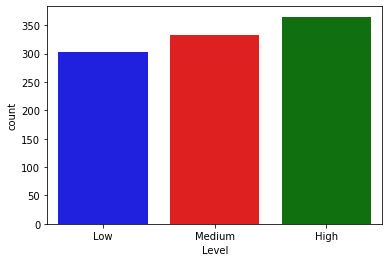

In [57]:
plot=sns.countplot(data=df, x='Level',palette=['blue','red','green'])


In [58]:
df.Gender.value_counts()


1    598
2    402
Name: Gender, dtype: int64

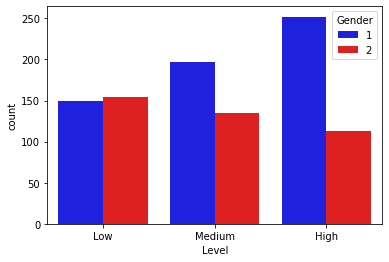

In [59]:
plot=sns.countplot(data=df, x='Level', hue='Gender', palette=['blue','red'])#Count 


In [60]:
#Anova Test(F-Test)The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.
#Categories of Ordinal Variables : The Matched Category --> 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [61]:
# split into input (X) and output (y) variables
#Feature Selection
X=df.drop(['Level'], axis=1)
Y=df['Level']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
print(fit.scores_)
selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':bestfeatures.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)


[   5.7525236    13.95146101  466.78559005  540.24308183  558.63539542
  413.33158061  488.98077993  316.04964468  689.93786068 1190.53667306
  369.48301716  722.18910137  404.80106585 1037.55861849  328.92891532
   97.64638765  183.39293937  111.397835     44.67981832  107.64910335
  127.07094251   81.8490122    70.28362711]


,Feature,Scores
9,Obesity,1190.536673
13,Coughing of Blood,1037.558618
11,Passive Smoker,722.189101
8,Balanced Diet,689.937861
4,Dust Allergy,558.635395
3,Alcohol use,540.243082
6,Genetic Risk,488.980780
2,Air Pollution,466.785590
5,OccuPational Hazards,413.331581
12,Chest Pain,404.801066


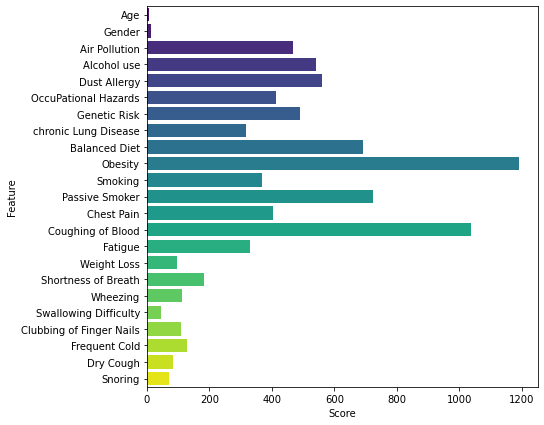

In [62]:

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')


In [80]:
selection=featureScores[featureScores['Score']>=5]#Selects features that scored more than 40
selection=list(selection['Feature'])
selection.append('Level')
cancer=df[selection]
cancer.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [81]:
# input variable
X = cancer.drop(['Level'], axis = 1)
y = cancer['Level']


In [82]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  #for classification report
#Svm model
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuarcy_svm=accuracy_score(y_test, y_pred_scv)
print(accuarcy_svm)

0.965


In [85]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuarcy_dt=accuracy_score(y_test, y_pred_dt)
print(accuarcy_dt)

0.995


In [103]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 51)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)
accuarcy_lr=accuracy_score(y_test, y_pred_lr)
print(accuarcy_lr)



0.995


/Users/aliahrabi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:

from sklearn.model_selection import GridSearchCV 

# defining parameter range
param_grid = {'C': [.01, .1, 1, 5, 10, 100], 
              'gamma': [0, .01, .1, 1, 5, 10, 100],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, verbose = 1)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    4.0s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 100],
                         'gamma': [0, 0.01, 0.1, 1, 5, 10, 100],
                         'kernel': ['rbf']},
             verbose=1)

In [105]:
predictions = grid.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        69
         Low       1.00      1.00      1.00        66
      Medium       1.00      1.00      1.00        65

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [106]:
grid.best_estimator_

SVC(C=1, gamma=0.01)

In [107]:
svc_classifier_pt = SVC(C=1, gamma=0.1) 
svc_classifier_pt.fit(X_train, y_train)
y_pred_svc_pt = svc_classifier_pt.predict(X_test)

In [108]:
accuracy_score(y_test, y_pred_svc_pt)

0.995

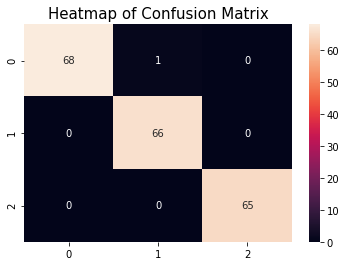

In [109]:

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_svc_pt)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [110]:
print(classification_report(y_test, y_pred_svc_pt))


              precision    recall  f1-score   support

        High       1.00      0.99      0.99        69
         Low       0.99      1.00      0.99        66
      Medium       1.00      1.00      1.00        65

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



In [111]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = svc_classifier_pt, X = X_train_sc,y = y_train, cv = 10)
print("Cross validation accuracy of SVC model = ", cross_validation)
print("\nCross validation mean accuracy of SVC model = ", cross_validation.mean())

Cross validation accuracy of SVC model =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Cross validation mean accuracy of SVC model =  1.0


In [112]:
class_obt={1:'low',2:'medeium',3:'high'}


In [113]:

import pickle #for dumping the model or we can use joblib library

pickle.dump(svc_classifier_pt, open('cancer_detector.pickle', 'wb'))
# load model
breast_cancer_detector_model = pickle.load(open('cancer_detector.pickle', 'rb'))
# predict the output
y_pred = breast_cancer_detector_model.predict(X_test)
# confusion matrix
print('Confusion matrix of XGBoost model: \n',confusion_matrix(y_test, y_pred),'\n')
# show the accuracy
print('Accuracy of SVC model = ',accuracy_score(y_test, y_pred))

Confusion matrix of XGBoost model: 
 [[68  1  0]
 [ 0 66  0]
 [ 0  0 65]] 

Accuracy of SVC model =  0.995
